# Seminar: Quantum Computing, an introduction


Welcome to the Qiskit workshop! These 10 exercises (12 questions in total) will improve your understanding of quantum circuits and each of the elements of Qiskit https://qiskit.org/documentation/the_elements.html

<img src="qiskitelements.png">


# Install Qiskit

To install Qiskit follow the steps described in the following documentation https://qiskit.org/documentation/install.html

Before you start solving the exercises, please download the latest release of the Qiskit tutorials available in https://github.com/Qiskit/qiskit-tutorials/releases or in the IBM Q Experience as shown in the following image:

<img src="qx1.png">


# Qiskit Terra

Qiskit Terra provides the foundational roots of Qiskit. Within Terra is a set of tools for composing quantum programs at the level of circuits and pulses, optimizing them for the constraints of a particular physical quantum processor, and managing the batched execution of experiments on remote-access backends. Terra is modularly constructed, simplifying the addition of extensions for circuit optimizations and backends.

Read the following tutorial: qiskit-tutorials-0.x.x /tutorials /circuits /1_getting_started_with_qiskit.ipynb



## Exercise 1

Create the following circuit using Qiskit:
<img src="circuit.png">

In [1]:
from qiskit import QuantumCircuit
circuitExerciseOne = QuantumCircuit(1,1)
circuitExerciseOne.h(0)
circuitExerciseOne.measure(0,0)
print(circuitExerciseOne)

     ┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


Now use the statevector simulator to run the above circuit, this simulator returns the quantum state, which is a complex vector of dimensions $2^n$, where 𝑛 is the number of qubits. 

In [2]:
from qiskit import Aer, execute

stateVectorBackend = Aer.get_backend("statevector_simulator")
resultExerciseOne = execute(circuitExerciseOne, stateVectorBackend).result()
outputstate = resultExerciseOne.get_statevector(circuitExerciseOne, decimals=3)
print(outputstate)

[0.+0.j 1.+0.j]


Which of the following is the correct quantum state?
a)

a) [0.+0.j 1.+0.j] or [1.+0.j 0.+0.j]
</div>

b) [0.707106.+0.j 0.707106.+0.j] or [0.707106.-0.j 0.707106.+0.j]
</div>

c) [0.+0.j 2.-0.j] or [2.+0.j 0.-0.j]

## Exercise 2

Now use the visualization function to plot the real and imaginary components of the quantum state.

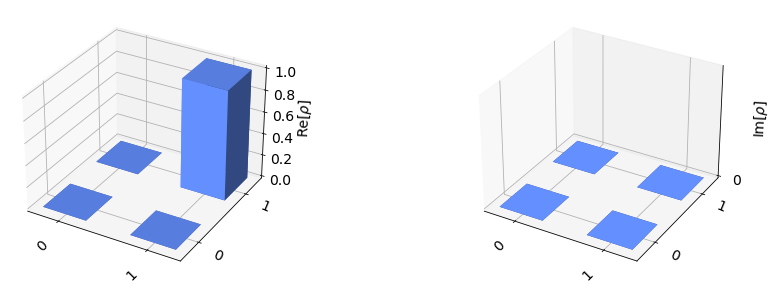

In [3]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

Which graphical representation corresponds to the above quantum state?
c)

a) <img src="option2a.png">

b) <img src="option2b.png">

c) We can obtain either of them depending on whether we observe the first possible quantum state or the second possible quantum state when measuring.

## Exercise 3

Use the qasm_simulator as backend in order to execute the above circuit. Use 1000 shots. Print the number of counts for each state.

In [4]:
backend_sim = Aer.get_backend('qasm_simulator')
result_sim = execute(circuitExerciseOne, backend_sim, shots=1024).result()
counts = result_sim.get_counts(circuitExerciseOne)
print(counts)

{'0': 520, '1': 504}


What states have been observed?
b)

a) only 0

b) 0 and 1

c) only 1

## Exercise 4


Plot the histogram of the above circuit execution.

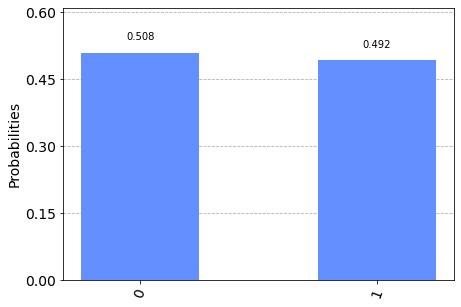

In [5]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

What does the histogram look like?
b)

a) <img src="option4a.png">

b) <img src="option44.png">

c) <img src="option4c.png">

## Exercise 5

Create the following circuit using Qiskit:

<img src="circuit2.png">

In [6]:
from qiskit import QuantumCircuit
circuitExerciseFive = QuantumCircuit(3,3)
circuitExerciseFive.h(0)
circuitExerciseFive.cx(0,1)
circuitExerciseFive.cx(0,2)
circuitExerciseFive.measure(1,1)
circuitExerciseFive.measure(0,0)
circuitExerciseFive.measure(2,2)
circuitExerciseFive.draw()

┌───┐             ┌─┐   
q_0: ┤ H ├──■────■─────┤M├───
     └───┘┌─┴─┐  │  ┌─┐└╥┘   
q_1: ─────┤ X ├──┼──┤M├─╫────
          └───┘┌─┴─┐└╥┘ ║ ┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     1  0  2

Now let's execute it in the qasm_simulator, and print the results

In [7]:
backendSimFive = Aer.get_backend('qasm_simulator')
resultSimFive = execute(circuitExerciseFive, backendSimFive, shots=1024).result()
countsFive = resultSimFive.get_counts(circuitExerciseFive)
print(countsFive)

{'000': 503, '111': 521}


Now let's execute it on a real device and print the results (choose as backend the least busy one). Hint: use your API Token from your IBM account, you may find it in the IBM Q experience as shown in the following image

<img src="qx.png">

In [8]:
from qiskit import IBMQ
provider = IBMQ.load_account()
chip_name = 'ibmq_athens'
backendRealFive = provider.get_backend(chip_name)
resultRealFive = execute(circuitExerciseFive, backendRealFive, shots=1024).result()
countsFiveReal = resultRealFive.get_counts(circuitExerciseFive)
print(countsFiveReal)

NameError: name 'countsFiveReal' is not defined

Print both results and compare them:

In [9]:
print(countsFive)
print(countsFiveReal)

### 5.1- What quantum states are observed when using the Aer simulator?

a)

a) 111 and 000

b) 011 and 000

c) 011, 000, 110, 111, 001, 100, 101 and 010

### 5.2- What quantum states are observed when using the real device?

a) 111 and 000

b) 011 and 000

c) 011, 000, 110, 111, 001, 100, 101 and 010

## Exercise 6

Now plot both results (the one from the simulation and the one from the real device) using a histogram.

In [10]:
plot_histogram([countsFive, countsFiveReal], legend=['Simulator', 'Real'])

Why do we observe small probabilities in the rest of the quantum states when executing the circuit on the real device? a)

a) Because today's quantum information processors are small and noisy, that's why we call quantum computers noisy, intermediate-scale quantum (NISQ) computers.

b) I don't observe these small probabilities, both results, the one run at the simulator and the one run on the real device are exactly the same.

c) It's because there are some errors in the simulator.

# Qiskit Aer

Qiskit Aer provides a high performance simulator framework for the Qiskit software stack. It contains optimized C++ simulator backends for executing circuits compiled in Qiskit Terra, and tools for constructing highly configurable noise models for performing realistic noisy simulations of the errors that occur during execution on real devices.

Read the following tutorial about running realistic classical simulations of quantum circuits based on noise models from IBM's devices: /qiskit-tutorials-0.x.x /tutorials /simulators /2_device_noise_simulation.ipynb

## Exercise 7

Run the circuit from the previous exercise in the qasm_simulator but this time simulate noise too.

{'000': 499, '001': 4, '010': 4, '011': 18, '100': 5, '101': 31, '110': 22, '111': 441}


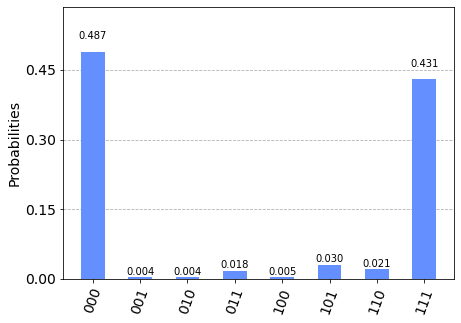

In [10]:
from qiskit.test.mock import FakeAthens
device_backend = FakeAthens()
resultNoisySeven = execute(circuitExerciseFive, device_backend, shots=1024).result()
countsNoisySeven = resultNoisySeven.get_counts(circuitExerciseFive)
print(countsNoisySeven)
plot_histogram(countsNoisySeven)

How is the result this time?
a)

a) It is almost the same to the result of execution on the real device.

b) Nothing has changed, the result is the same as when we weren't simulating noise because Aer's simulators simulate noise by default.

## Exercise 8

We can also build noise models using Qiskit Aer. Read this tutorial: /qiskit-tutorials-0.x.x /qiskit /advanced /aer /3_building_noise_models.ipynb (Note that this tutorial part of qiskit tutorials version 0.15.x).

Let's import the required libraries 

In [11]:
import numpy as np
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error


We will use the following circuit:

In [12]:
# System Specification
n_qubits = 4
circ = QuantumCircuit(n_qubits, n_qubits)

# Test Circuit
circ.h(0)
for qubit in range(n_qubits - 1):
    circ.cx(qubit, qubit + 1)
circ.measure(range(4), range(4))
print(circ)

     ┌───┐          ┌─┐              
q_0: ┤ H ├──■───────┤M├──────────────
     └───┘┌─┴─┐     └╥┘     ┌─┐      
q_1: ─────┤ X ├──■───╫──────┤M├──────
          └───┘┌─┴─┐ ║      └╥┘┌─┐   
q_2: ──────────┤ X ├─╫───■───╫─┤M├───
               └───┘ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_3: ────────────────╫─┤ X ├─╫──╫─┤M├
                     ║ └───┘ ║  ║ └╥┘
c: 4/════════════════╩═══════╩══╩══╩═
                     0       1  2  3 


For this circuit the ideal simulation would be:

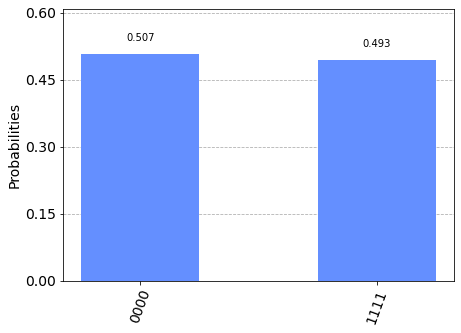

In [13]:
# Simulator
simulator = QasmSimulator()
# Ideal execution
job = execute(circ, simulator)
result_ideal = job.result()
plot_histogram(result_ideal.get_counts(0))

We will use the following noise model:

In [14]:
# Example error probabilities
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'u1', 'u2', 'u3']
  Instructions with noise: ['measure', 'u1', 'u2', 'cx', 'u3', 'reset']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3', 'cx']


Let's execute a noisy simulation of this circuit with this noise model 

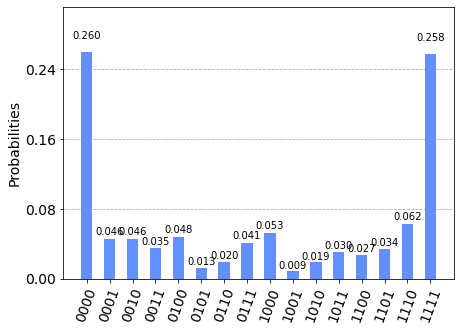

In [15]:
noisy_simulator = QasmSimulator(noise_model=noise_bit_flip)
job = execute(circ, noisy_simulator)
result_bit_flip = job.result()
counts_bit_flip = result_bit_flip.get_counts(0)
# Plot noisy output
plot_histogram(counts_bit_flip)

Now apply it to the circuit described in Exercise 5 and plot the results with a histogram.

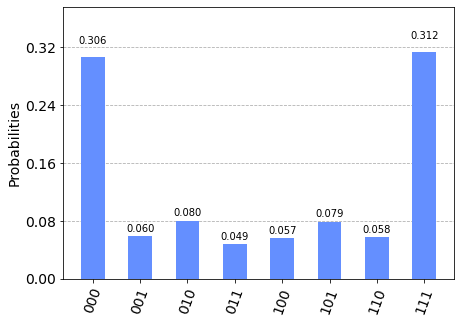

In [16]:
resultNoisyExerciseFive = execute(circuitExerciseFive, noisy_simulator).result()
countsNoisyExerciseFive = resultNoisyExerciseFive.get_counts(0)
# Plot noisy output
plot_histogram(countsNoisyExerciseFive)

What does the histogram look like? c)

a) <img src="option8a.png">

b) <img src="option8b.png">

c) <img src="option8c.png">

# Qiskit Ignis

Qiskit Ignis is a framework for understanding and mitigating noise in quantum circuits and devices. Ignis provides self-contained experiments that include tools for generating the circuits that can be executed on real backends via Terra (or on simulators via Aer) and the tools for fitting the results and analysing the data. The experiments provided in Ignis are grouped into the topics of characterization, verification and mitigation. Characterization experiments, such as T1 (qubit lifetime) and T2 (qubit dephasing), are designed to measure noise parameters in the system. Verification experiments, such as randomized benchmarking and tomography, are designed to verify gate and small circuit performance. Mitigation experiments run calibration circuits that are analysed to generate mitigation routines that can be applied to arbitrary sets of results run on the same backend.

Read the following tutorial: /qiskit-tutorials-0.x.x /tutorials /noise /3_measurement_error_mitigation.ipynb


## Exercise 9
    

Generate a calibration matrix for the 4 qubits Q0, Q2, Q3 and Q4 in a 8-qubit Quantum Register [Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7]. Use the same noise model than the one that is used in the tutorial but for the appropiate number of qubits in this exercise. (For this exercise it is recommended to restart the kernel).

In [17]:
# Import general libraries (needed for functions)
import numpy as np
import time

# Import Qiskit classes
import qiskit
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.providers.aer import noise
from qiskit.tools.visualization import plot_histogram

# Import measurement calibration functions
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)

In [18]:
qr = qiskit.QuantumRegister(8)
qubit_list = [0,2,3,4]
meas_calibs, state_labels = complete_meas_cal(qubit_list=qubit_list, qr=qr, circlabel='mcal')

In [19]:
state_labels

['0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111']

In [20]:
backend = qiskit.Aer.get_backend('qasm_simulator')
job = qiskit.execute(meas_calibs, backend=backend, shots=1000)
cal_results = job.result()
# The calibration matrix without noise is the identity matrix
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
print(meas_fitter.cal_matrix)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [27]:
backend = qiskit.Aer.get_backend('qasm_simulator')
noisyResultsExercise9 = qiskit.execute(meas_calibs, backend=backend, shots=1000, noise_model=noise_bit_flip).result()

In [28]:
# Calculate the calibration matrix with the noise model
meas_fitter_noisy = CompleteMeasFitter(noisyResultsExercise9, state_labels, qubit_list=qubit_list, circlabel='mcal')
print(meas_fitter_noisy.cal_matrix)

[[0.642 0.089 0.08  0.002 0.077 0.006 0.011 0.    0.081 0.009 0.011 0.002
  0.007 0.001 0.    0.   ]
 [0.084 0.648 0.01  0.07  0.007 0.076 0.001 0.011 0.009 0.08  0.    0.013
  0.001 0.007 0.    0.001]
 [0.063 0.009 0.634 0.06  0.008 0.001 0.071 0.008 0.007 0.    0.071 0.009
  0.    0.    0.01  0.001]
 [0.009 0.055 0.081 0.699 0.    0.007 0.006 0.058 0.001 0.009 0.007 0.087
  0.    0.002 0.    0.01 ]
 [0.082 0.009 0.007 0.    0.655 0.068 0.065 0.013 0.007 0.    0.    0.
  0.08  0.006 0.009 0.002]
 [0.01  0.064 0.    0.005 0.067 0.67  0.007 0.081 0.    0.008 0.    0.001
  0.014 0.074 0.001 0.006]
 [0.003 0.    0.073 0.01  0.07  0.007 0.65  0.086 0.002 0.    0.011 0.001
  0.012 0.003 0.064 0.007]
 [0.001 0.005 0.008 0.059 0.007 0.063 0.075 0.644 0.    0.    0.    0.007
  0.    0.009 0.008 0.084]
 [0.08  0.008 0.009 0.    0.008 0.001 0.001 0.    0.639 0.079 0.055 0.011
  0.066 0.004 0.01  0.   ]
 [0.009 0.092 0.001 0.003 0.    0.007 0.    0.001 0.067 0.666 0.011 0.074
  0.007 0.085 0.001 

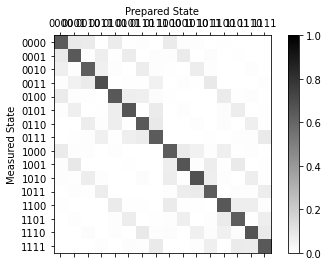

In [29]:
# Plot the calibration matrix
meas_fitter_noisy.plot_calibration()

What is the measurement fidelity? (choose the closest value) b)

In [30]:
# What is the measurement fidelity?
print("Average Measurement Fidelity: %f" % meas_fitter_noisy.readout_fidelity())

Average Measurement Fidelity: 0.654563


a) 0.463062

b) 0.567938

c) 0.789201

# Qiskit Aqua

Qiskit Aqua contains a library of cross-domain quantum algorithms upon which applications for near-term quantum computing can be built. Aqua is designed to be extensible, and employs a pluggable framework where quantum algorithms can easily be added. It currently allows the user to experiment on chemistry, AI, optimization and finance applications for near-term quantum computers.

In the IBM Q Experience tutorials go to advanced/ aqua/ machine_learning/ qsvm_classification.ipynb and read the notebook. (Or in the tutorials you have downloaded go to /qiskit-tutorials-0.19.x /legacy-tutorials /aqua /machine_learning /qsvm_classification.ipynb).

## Exercise 10

After seeing this example of how to use a Quantum Machine Learning algorithm, in this case the QSVM, answer the following questions:

### 10.1- How would a data scientist use a quantum computer? b)

a) The data scientist would map his problem to a quantum circuit, use Qiskit Terra to build the circuit and execute it in a real device or simulator. After that he/she would translate the results into the information he/she was looking for.

b) The data scientist would use the high level API from Qiskit Aqua (for example QSVM), he/she would give it the required input data and the Aqua API would translate it into the quantum circuit and execute it in the chosen backend. The data scientist would receive the results he was looking for.

c) Data scientists don't need quantum computers they only use GPUs as accelerators.

### 10.2- What are the 4 main areas of application in which Aqua is focused? b)

a) Optimization, Chemistry, Biology and Mathematics

b) Optimization, Chemistry, Finance and Machine Learning

c) Finance, Chemistry, Physics, and Biology

## Congratulations, you've finished the Qiskit workshop! Now you know a lot more about how to program with a quantum computer. Write your answers down and complete the test in the online platform in order to get credit for the seminar. Good luck!

<img src="qiskitlogo.png">


This code is a part of Qiskit

© Copyright IBM 2017, 2021.

This code is licensed under the Apache License, Version 2.0. You may
obtain a copy of this license in the LICENSE.txt file in the root directory
of this source tree or at http://www.apache.org/licenses/LICENSE-2.0.

Any modifications or derivative works of this code must retain this
copyright notice, and modified files need to carry a notice indicating
that they have been altered from the originals.
